In [1]:
import sys
sys.path.append("../")
sys.path.append("../../")

# Usage of xai-comparison package

This notebook demonstrates the setup and usage of the XAI Comparison package, using a `RandomForestClassifier` on the German credit dataset.

## Steps

1. Define the model
2. Load the dataset
3. Set the mode (classification/regression)
4. Configure parameters
5. Initialize the `ComparisonFactory`
6. Create and apply comparisons

In [2]:
# Step 1: Define the model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

## Step 2: Load the dataset

We will use the German credit dataset provided by the XAI Comparison package.

In [3]:
from xai_compare.datasets import german_credit

# Load the dataset
X, y = german_credit()
print("Data loaded successfully!")

Data loaded successfully!


## Step 3: Set the mode

Specify the mode as either `MODE.CLASSIFICATION` or `MODE.REGRESSION`.

In [4]:
from xai_compare.config import MODE

# Set the mode
mode = MODE.CLASSIFICATION

## Step 4: Configure parameters

In this step, we define the parameters for the `ComparisonFactory`. These parameters include the model, dataset, target, and additional configurations for the explainers.

Specifying Default Explainers
By default, the XAI Comparison package supports several explainers, including SHAP, LIME, and Permutation Importance. You can specify which explainers to use by setting the `default_explainers` parameter. Here’s how you can do it:

In [5]:
from xai_compare.config import EXPLAINERS

params = {
    'model': model,
    'data': X,
    'target': y,
    'verbose': False,
    'mode': mode,
    'default_explainers': EXPLAINERS,  
    'custom_explainer': None  # We will not use a custom explainer in this example
}

This configuration will tell the `ComparisonFactory` to use SHAP, LIME, and Permutation Importance for the explainability comparisons.

## Step 5: Initialize the `ComparisonFactory`

The `ComparisonFactory` is responsible for creating comparison objects based on the given explainers and other parameters.
This class simplifies the process of implementing different types of comparison methods by providing a common interface for specifying the required train and test datasets along with the model.

In [6]:
from xai_compare.factories.factory import ComparisonFactory

# Initialize the ComparisonFactory
comparison_factory = ComparisonFactory(**params)

## Step 6: Create and apply comparisons

Loop through the comparison techniques and apply them to the model and data.

Applying feature_selection...


Explainers: 100%|██████████| 3/3 [01:11<00:00, 23.73s/it]


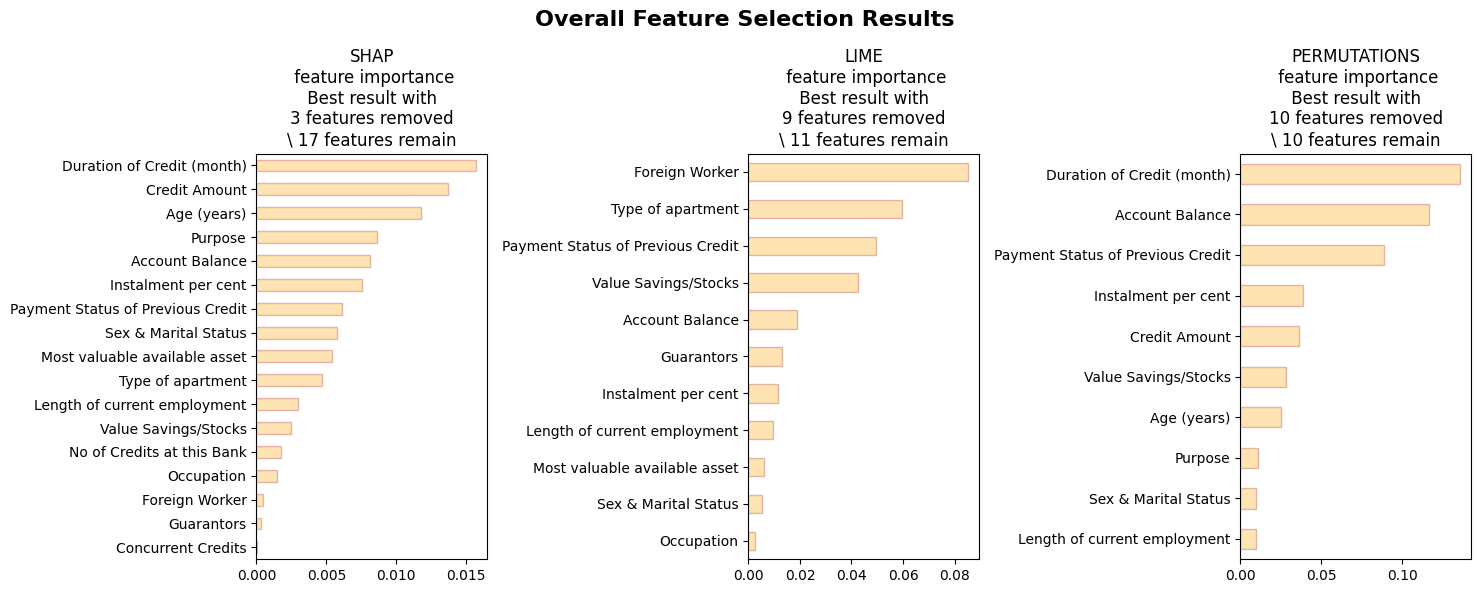

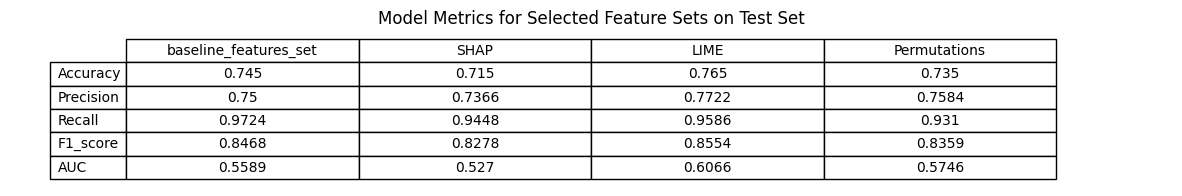

Applying consistency...


Processing folds: 100%|██████████| 5/5 [00:12<00:00,  2.44s/it]


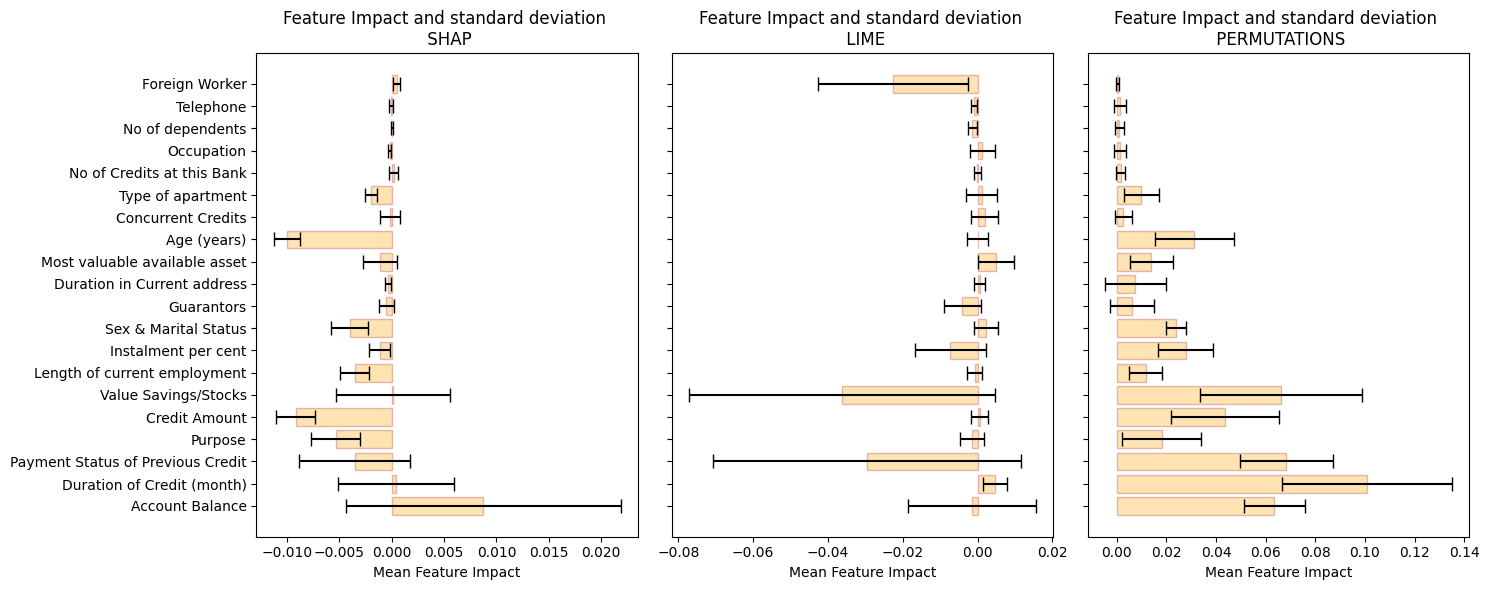

               min_std   max_std  mean_std  median_std
SHAP          0.000112  0.013087  0.002224    0.001133
LIME          0.000827  0.041189  0.008544    0.003309
Permutations  0.000595  0.034157  0.011137    0.008718


In [7]:
from xai_compare.config import COMPARISON_TECHNIQUES

for technique in COMPARISON_TECHNIQUES:
    print(f"Applying {technique}...")
    comparison = comparison_factory.create(technique)
    comparison.apply()
    comparison.display()

## Conclusion

This notebook demonstrates how to use the XAI Comparison package to compare different explainability techniques on a RandomForestClassifier model using the German credit dataset. By following these steps, you can apply the package to your own models and datasets to gain insights into feature importance and model behavior. To better control these tests, please follow the specific notebook demonstrations for each of the comparison tests.